`Weather Prediction`

Importing Libraries

In [554]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

Importing DATA

In [555]:
data = pd.read_csv(r'C:\Users\HP\Desktop\Weather Prediction\seattle-weather.csv')

data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


Preprocessing Data

In [556]:
# dropping date column

data.drop('date',axis=1, inplace=True)
data

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [557]:
# dropping all rows expect rown with output 'rain', 'snow' and 'sun' 
# it is important because other classes data is less deleting them will reduce outliers

s = ['rain', 'sun', 'snow']

for i in range(len(data)):
    if data['weather'][i] not in s:
        data = data.drop(index = i)
        
data.to_csv('Weather_Data.csv', index=False)
data

,precipitation,temp_max,temp_min,wind,weather
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
5,2.5,4.4,2.2,2.2,rain
...,...,...,...,...,...
1455,0.0,4.4,0.0,2.5,sun
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1459,0.0,5.6,-1.0,3.4,sun


In [558]:
classes = data.iloc[:,4].unique()
features = np.array(data.columns)

print(f'Classes : {classes}')
print(f'Features : {features}')

Classes : ['rain' 'sun' 'snow']
Features : ['precipitation' 'temp_max' 'temp_min' 'wind' 'weather']


In [559]:
# labeling data using label encoder function

le = LabelEncoder()
data['weather'] = le.fit_transform(data['weather'])

label_mapping = dict(zip(le.classes_, range(len(le.classes_))))

label_mapping


{'rain': 0, 'snow': 1, 'sun': 2}

In [560]:
# checking for any null values

data.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

Test - Train Split

In [561]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train


,precipitation,temp_max,temp_min,wind
1344,5.3,16.1,11.7,2.4
924,0.0,29.4,15.0,2.6
592,1.8,21.1,17.2,1.0
1258,0.0,20.0,11.7,2.3
859,2.0,13.3,7.2,5.6
...,...,...,...,...
1212,0.3,25.0,10.6,2.3
1251,0.0,26.7,12.8,4.3
1446,21.8,6.7,3.9,6.0
935,0.0,20.6,12.8,4.7


Plotting weather with all other features

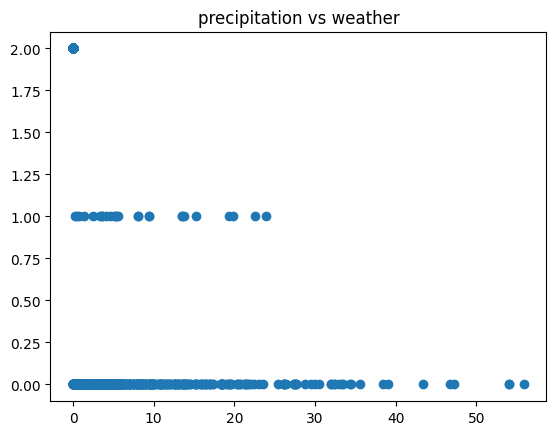

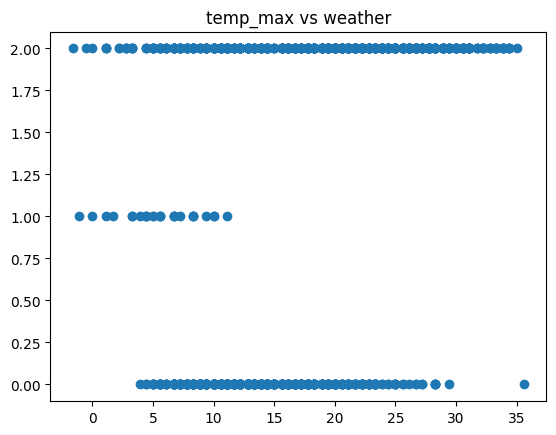

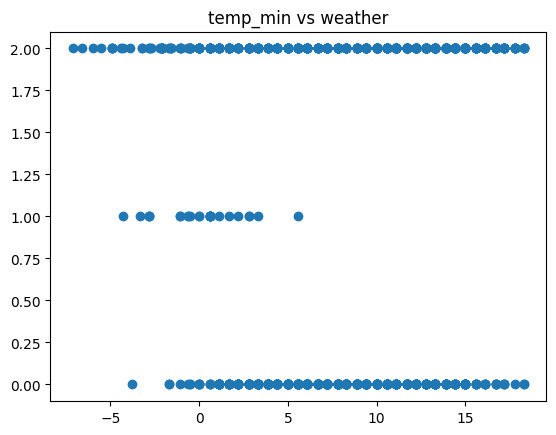

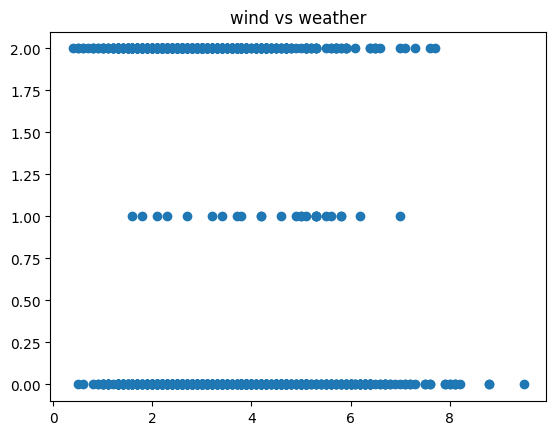

In [562]:
# we can clearly see the features have non linear relationships with target

for i in X.columns:
    plt.scatter(X[i],y)
    plt.title(f'{i} vs weather')
    plt.show()

Applying Linear Regression

In [563]:

model1 = LinearRegression()

model1.fit(X_train, y_train)

y_pred1 = np.round(model1.predict(X_test))

mse = mean_squared_error(y_test, y_pred1)
accuracy = accuracy_score(y_test, y_pred1)

print(f'mean square error  :  {mse}')
print(f'accuracy           :  { accuracy*100 } %')

mean square error  :  0.6921119592875318
accuracy           :  41.475826972010175 %


Applying Logistic Regression

In [564]:
model2 = LogisticRegression(max_iter=400)

model2.fit(X_train, y_train)

y_pred2 = np.round(model2.predict(X_test))

mse = mean_squared_error(y_test, y_pred2)
accuracy = accuracy_score(y_test, y_pred2)

print(f'mean square error  :  {mse}')
print(f'accuracy           :  { accuracy*100 } %')


mean square error  :  0.26717557251908397
accuracy           :  92.36641221374046 %


Applying Support Vector Machine

In [565]:
model3 = SVC(kernel='linear', C=1.0)

model3.fit(X_train, y_train)

y_pred3 = np.round(model3.predict(X_test))

mse = mean_squared_error(y_test, y_pred3)
accuracy = accuracy_score(y_test, y_pred3)

print(f'mean square error  :  {mse}')
print(f'accuracy           :  { accuracy*100 } %')

mean square error  :  0.2366412213740458
accuracy           :  93.12977099236642 %


Applying Decision Tree

In [566]:
model4 = DecisionTreeClassifier()

model4.fit(X_train, y_train)

y_pred4 = np.round(model4.predict(X_test))

mse = mean_squared_error(y_test, y_pred4)
accuracy = accuracy_score(y_test, y_pred4)

print(f'mean square error  :  {mse}')
print(f'accuracy           :  { accuracy*100 } %')

mean square error  :  0.2900763358778626
accuracy           :  91.6030534351145 %


Predictions from the trained model

In [567]:
# function to decode class from output

def key_from_value(dic, op):
    for key in dic:
        if dic[key] == op:
            return key
        

# key_from_value(label_mapping, 0)

In [568]:
# function to get most probable output

def max_freq_output(array):
    freq = []
    for i in range(0,5):
        freq.append(array.count(i))
    
    index_max_freq_class = freq.index(max(freq))
    
    return (index_max_freq_class)

# max_freq_output([4,0,1,0])
# output should be 0 for given array

Combining all the models for better predictions

In [569]:
inp = X_test

op1 = (model1.predict(inp))
op2 = (model2.predict(inp))
op3 = (model3.predict(inp))
op4 = (model4.predict(inp))

op = []
for i in range(len(inp)):
    o = int(max_freq_output([op1[i],op2[i], op3[i], op4[i]]))
    op.append(o)

mse = mean_squared_error(y_test, op)
accuracy = accuracy_score(y_test, op)

print(f'mean square error  :  {mse}')
print(f'accuracy           :  { accuracy*100 } %')

mean square error  :  0.2366412213740458
accuracy           :  93.12977099236642 %


For Live inputs 

In [572]:
inp = []
for i in features[:4]:
    x = (input(f'{i}  :'))
    if x == '':
        inp.append(0)
    else:
        inp.append(float(x))
    
print(f'input : {inp}')

inp = pd.DataFrame([inp], columns= list(features[:4]))
op1 = int(model1.predict(inp))
op2 = int(model2.predict(inp))
op3 = int(model3.predict(inp))
op4 = int(model4.predict(inp))

op = max_freq_output([op1, op2, op3, op4])

op = key_from_value(label_mapping, op) 

print(f'Weather will be : {op}')

input : [12.0, 8.0, 3.0, 2.0]
Weather will be : rain
